# Проект: Исследование стартапов

- Автор: Косарева Алина
- Дата: 08.06 - 13.06.2025

## Введение

Заказчик - финансовая компания. Бэкграунд компании: предоставление льготных займов стартапам. 

Цель заказчика: расширить свой профиль и выйти на инвестиционный рынок для покупки, развития и перепродажи молодых и перспективных стартапов. 
Стратегическая задача: построение жизнеспособной бизнес-модели.

Цель нашей работы: сформировать чистый, логически связный набор данных и получить на его основе первые бизнес‑выводы, которые помогут нам понять:
- насколько текущие данные пригодны для построения модели отбора стартапов;
- какие дополнительные данные нужно собирать и какова их ожидаемая ценность;
- заложить фундамент для последующей разработки системы принятия инвестиционных решений.

Задачи:
1. подготовить единый датасет
- выявить оптимальные столбцы для объединения и анализа
- выявить и устранить ошибки, пропуски и противоречивые значения.

2. оценить достоверность ключевых атрибутов
- проверить корректность сведений
- интерпретировать записи о сделках

3. проанализировать факторы стоимости
- исследовать зависимость цены покупки от отрасли стартапа \ количество раундов финансирования до сделки
- рассчитать и визуализировать числовые показатели и их динамику

4. выявить признаки успешных сделок
- определить метрики и критерии, повышающие вероятность удачной покупки и перепродажи
- оценить достаточность метрик в датасетах


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:


acquisition.csv (информация о покупках одними компаниями других компаний)
- `id` — идентификатор покупки.
- `acquiring_company_id` — идентификатор покупающей компании.
- `acquired_company_id` — идентификатор покупаемой компании.
- `term_code` — варианты расчёта.
- `price_amount` — сумма сделки.
- `acquired_at` — дата сделки.


company_and_rounds.csv (информация о компаниях и раундах финансирования)
- `company ID` — идентификатор компании.
- `name` — название компании.
- `category code` — категория области деятельности компании.
- `status` — статус компании.
- `founded at` — дата инвестирования.
- `closed at` — дата закрытия компании.
- `domain` — официальный сайт компании.
- `network username` — ник компании в сети.
- `country code` — код страны компании.
- `investment rounds` — число инвестиционных раундов.
- `funding round` — число раундов финансирования.
- `funding total` — сумма финансирования.
- `milestones` — вехи финансирования.
- `funding round id` — идентификатор этапа финансирования.
- `company id` — идентификатор компании.
- `funded at` — дата финансирования.
- `funding round type` — тип финансирования.
- `raised amount` — сумма финансирования.
- `pre money valuation` — предварительная денежная оценка.
- `participants` — число участников.
- `is first round` — является ли раунд первым.
- `is last round` — является раунд последним.


people.csv (информация об образовании сотрудника)
- `id` — идентификатор записи об образовании.
- `person_id` — идентификатор работника.
- `instituition` — название учебного заведения.
- `graduated_at` — дата получения образования.


education.csv (информация о сотрудниках)
- `id` — идентификатор сотрудника.
- `first_name` — имя сотрудника.
- `last_name` — фамилия сотрудника.
- `company_id` — идентификатор компании.
- `network_username` — ник в социальных сетях.


degrees.csv (информация о типе образования сотрудника)
- `id` — идентификатор записи.
- `object_id` — идентификатор сотрудника.
- `degree_type` — тип образования.
- `subject` — специальность.

Опциональные датасеты:
* fund.csv (информация о фондах)
* investment.csv (информация о раундах инвестирования)


### 1.1. Вывод общей информации, исправление названия столбцов



In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#### Анализ датасета `acquisition`

In [2]:
acq = pd.read_csv('/datasets/acquisition.csv')
acq.info()
acq.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01


Много пропусков в столбце с вариантами расчета, столбец можно исключить (необходимо в дальнейшем рассмотреть, понадобится ли он для анализа). Столбец `acquired_at` привести к временному типу данных, `term_code` - к категоральному            

Проведем небольшой анализ:

In [3]:
pd.DataFrame(round(acq.isna().mean() * 100, 2)).style.background_gradient(cmap='coolwarm')

,0
id,0.000000
acquiring_company_id,0.000000
acquired_company_id,0.000000
term_code,80.540000
price_amount,0.000000
acquired_at,0.310000


Большинство пропусков в столбце с вариантов расчета (наличные, акциии и т.п). Переведем к категоральному типу

In [4]:
acq['term_code'] = acq['term_code'].astype('category')
print("Уникальные значения term_code:", acq['term_code'].unique())

Уникальные значения term_code: [NaN, 'cash', 'stock', 'cash_and_stock']
Categories (3, object): ['cash', 'stock', 'cash_and_stock']


In [5]:
print(acq['price_amount'].describe())
print("Сколько нулевых price_amount:", (acq['price_amount'] == 0).sum())

count    9.407000e+03
mean     3.932965e+08
std      2.682198e+10
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.343200e+04
max      2.600000e+12
Name: price_amount, dtype: float64
Сколько нулевых price_amount: 6931


Изучен столбец с суммой сделки. Большая часть сделок указана в нулевой сумме (либо нет информации и она была заполнена как 0, либо сделки не имели суммы. Всего 6931 сделка имеет нулевую сумму, что очень много. Небольшая чатсь сделок (75й процентиль) были произведены на сумму более 23 тыс. долл. Максимальный выброс - 2.6 трлн, что является аномальным значением, учитывая, что самый дорогой стартап был оценен в 350 млрд долл (комапния SpaceX). Таким образом, среднее значение (~400 млн) сильно искажено выбросами. 

Выводы по датасету `acquisition`:
1. В дальнейшем нужно будет преобразовать столбец `acquired_at` во временной тип.
2. Работать со столбцом со стоимостью сделки необходимо аккуратно, так как значения аномальны. 
3. Столбец `term_code` содержит много пропусков, возможно по этой причине у нас такие искаженные данные по стоимости

#### Анализ датасета `company_and_rounds`

In [6]:
company = pd.read_csv('/datasets/company_and_rounds.csv')
company.info()
company.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0


1. Написание столбцов необходимо привести к стилю snake_case. 
2. Изменить типы данных: 
- `company ID`, `investment  rounds`, `funding  rounds`, `milestones`, `participants` - к int8, 
- `category code`, `country code`, `funding  round  type` - к категоральным значениям, 
- `founded at`, `closed at`, `funded at` - к временному
- `is  first  round` \ `is  last  round` - к булевому типу.

3. Много пропусков, часть таблицы с информацией о раундах содержит лишь 1\4 данных.
4. Необходимо понять, что делать в двумя одинаковыми по названию столбцами - `company id`
5. Стоит изучить столбцы на наличие аномальных значений как в предыдущем датасете.

Переименовываем два столбца, чтобы не было путаницы

In [7]:
company.rename(columns = {'company  ID':'company id', 'company  id':'company round id'}, inplace=True)
print(company.columns[[0, 14]])

Index(['company id', 'company round id'], dtype='object')


Сразу приводим к стилю snake_case

In [8]:
new_columns = []
for col in company.columns:
    col = '  '.join(col.strip().lower().split())  
    col = col.replace('  ', '_')               
    new_columns.append(col)

company.columns = new_columns

print(company.columns)

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_round_id', 'funded_at',
       'funding_round_type', 'raised_amount', 'pre_money_valuation',
       'participants', 'is_first_round', 'is_last_round'],
      dtype='object')


In [9]:
# к целочисленному виду
int_columns = ['investment_rounds', 'funding_rounds', 'milestones', 'participants']
for col in int_columns:
    company[col] = pd.to_numeric(company[col], errors='coerce').astype('Int64')

# к категоральному
cat_columns = ['category_code', 'country_code', 'funding_round_type', 'status']
for col in cat_columns:
    company[col] = company[col].astype('category')
    
# к булевому
bool_columns = ['is_first_round', 'is_last_round']
for col in bool_columns:
    company[col] = company[col].astype('bool')

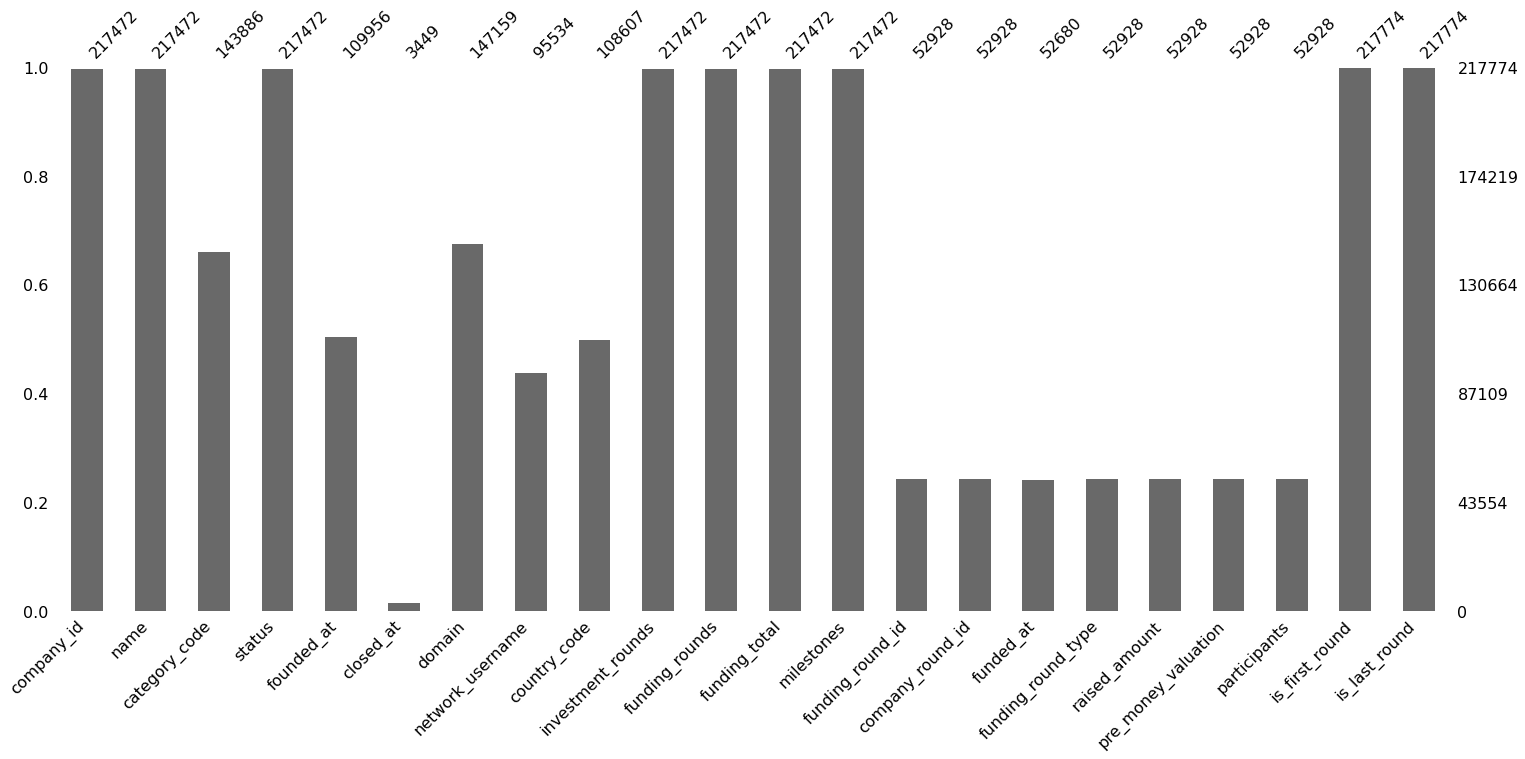

In [10]:
!pip install missingno -q
import missingno as msno

msno.bar(company)
plt.show()

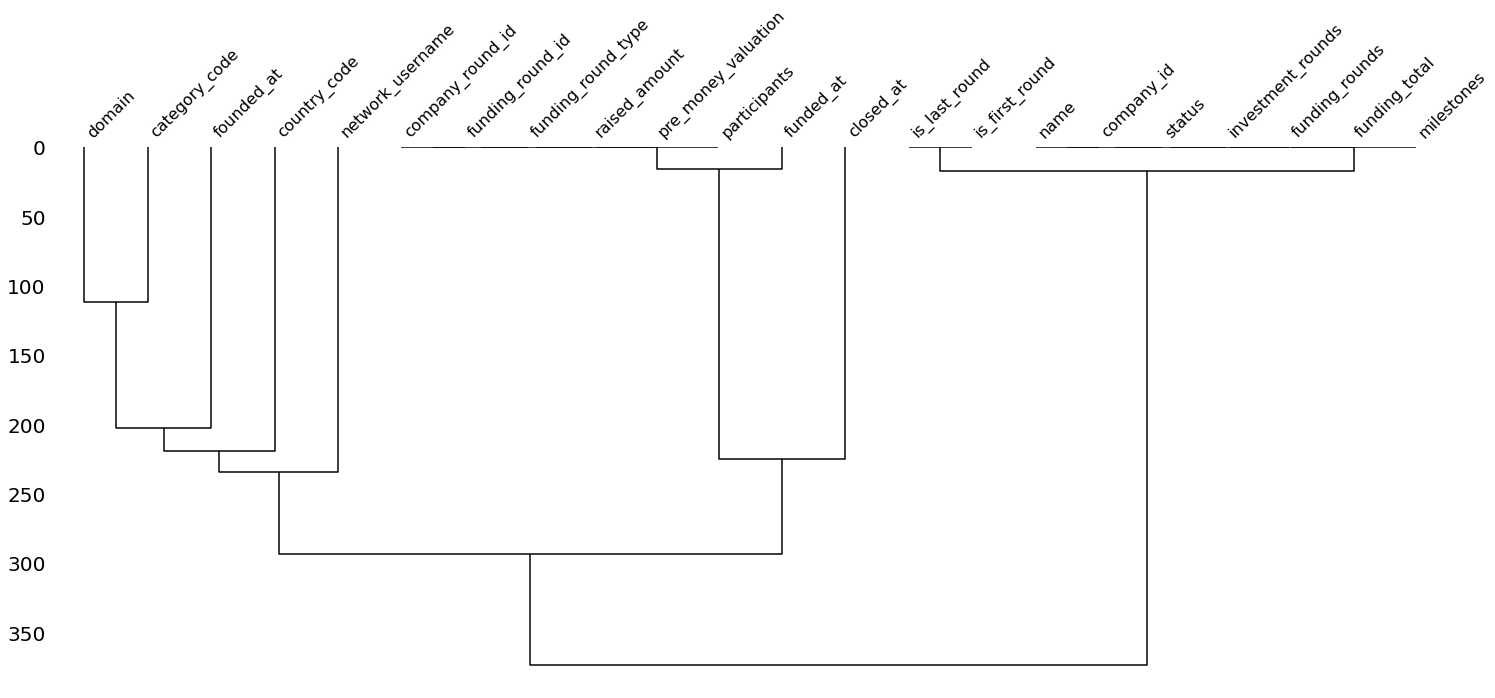

In [11]:
# Второй вариант
# Метод dendrogram из библиотеки missingno
!pip install missingno -q
import missingno as msno
msno.dendrogram(company)
plt.show()

Большинство пропусков приходится на столбец с датой закрытия стартапа. В этих пропусках нет ничего необычного, так как, вероятно, большинство компаний все еще функционирует

Предположение: данный датасет стал рез-ом склейки двух других, в связи с чем много пропусков в столбцах, относящихся к финансированию

In [12]:
company['company_round_id'] = company['company_round_id'].combine_first(company['company_id'])
company['company_id'] = company['company_id'].fillna(company['company_round_id'])

In [13]:
company[['funding_total', 'raised_amount', 'pre_money_valuation']].describe()

,funding_total,raised_amount,pre_money_valuation
count,2.174720e+05,5.292800e+04,5.292800e+04
mean,5.996191e+06,7.946092e+06,3.294525e+05
std,4.893160e+07,4.216821e+07,6.531803e+07
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.463300e+05,0.000000e+00
50%,0.000000e+00,1.600000e+06,0.000000e+00
75%,0.000000e+00,6.700000e+06,0.000000e+00
max,5.700000e+09,3.835050e+09,1.500000e+10


Столбец с суммой финансирования содержит аномальные значения: большинство значений содержат нулевые значения, с макс. показателем - 5.7 млрд. 

Столбец `raised_amount` содержит меньшее кол-во данных. Распределение сдвинуто: много маленьких значений, редкие большие выбросы. Среднее: ~7.9 млн долларов, медиана: 1.6 млн, максимум: ~3.8 млрд. 

В столбце `pre_money_valuation` есть единичные сверхвысокие оценки. Среднее: ~329 тыс., максимум: 15 млрд.

In [14]:
company[['investment_rounds', 'funding_rounds', 'milestones']].describe()

,investment_rounds,funding_rounds,milestones
count,217472.000000,217472.000000,217472.000000
mean,0.037711,0.612171,0.650442
std,1.962712,1.433500,0.826408
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000
max,478.000000,15.000000,9.000000


Судя по данным столбца `investment_rounds` почти все компании не участвовали в инвестиционных раундах. Среднее равно нулю, а максимальное - 478, что является аномальным показателем для кол-ва инвестиционных раундов

Больше половины компаний не имели раундов финансирования, возможно не были допущены. При этом аномальных выбросов нет, так как 15 раундов (макс. значение) вполне реалистично.

При рассмотрении `milestones`, можно предположить, что большинство компаний не достигли ни одного этапа развития. 25% компаний имеют 1 и более - это более зрелые стартапы.

In [15]:
anomaly_date = (company['closed_at'] < company['founded_at'])
anomaly_date_count = anomaly_date.sum()
print("Количество нелогичных дат (closed_at < founded_at):", anomaly_date_count)

Количество нелогичных дат (closed_at < founded_at): 48


Вывод по датасету `company`:
1. Много пропусков в столбцах с финансовыми значениями, что связано либо с отсутсвием данных, либо с отказом стартапу в финансировании. 
2. Имеются сильные выбросы в столбцах с фин. показателями.
3. Имеющиеся данные подойдут для оценки выживаемости стартапа.

#### Анализ датасета `people`

In [16]:
people = pd.read_csv('/datasets/people.csv')
people.info()
people.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN


In [17]:
people['company_id'] = pd.to_numeric(people['company_id'], errors='coerce').astype('Int64')

Столбец `company_id` приведен к целочисленному значению. В остальном проблем в данных не обнаружено. Много пропусков наблюдается в столбце с ником пользователя.

#### Анализ датасета `education`

In [18]:
edu = pd.read_csv('/datasets/education.csv')
edu.info()
edu.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01


Стоит привести столбец `instituition` к более распространенному написанию - "institution" 

In [19]:
edu.rename(columns = {'instituition':'institution'}, inplace = True)

Других проблем с данными не обнаружено. Много пропусков в столбце с окончанием университета (около половины), что может быть обусловлено отсутвием данных или тем, что человек не закончил университет.

#### Анализ датасета `degrees`

In [20]:
deg = pd.read_csv('/datasets/degrees.csv')
deg.info()
deg.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication


In [21]:
deg['degree_type'] = deg['degree_type'].astype('category')

Значения в `degree_type` приведены к категоральному типу.

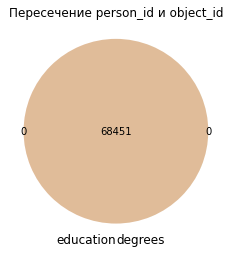

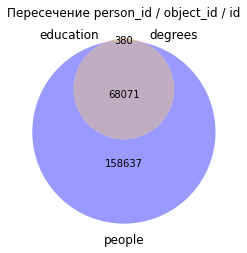

In [22]:
import pandas as pd

!pip install matplotlib-venn -q
from matplotlib_venn import venn2, venn3
import matplotlib.pyplot as plt

deg['object_id_new'] = deg['object_id'].astype(str).str.replace('p:', '', regex=False).str.strip()
deg['object_id_new'] = pd.to_numeric(deg['object_id_new'], errors='coerce').astype('Int64')

edu_ids = set(edu['person_id'].dropna().unique())
deg_ids = set(deg['object_id_new'].dropna().unique())

venn2([edu_ids, deg_ids], set_labels=('education', 'degrees'))
plt.title("Пересечение person_id и object_id")
plt.show()

people_ids = set(people['id'].dropna().unique())

venn3([edu_ids, deg_ids, people_ids], set_labels=('education', 'degrees', 'people'))
plt.title("Пересечение person_id / object_id / id")
plt.show()

#### Анализ датасета `fund`

In [23]:
fund = pd.read_csv('/datasets/fund.csv')
fund.info()
fund.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11650 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0


`founded_at` привести к временному значению, `country_code` - к категоральному.

В финансовых данных, которые могли бы быть нам полезны, нет пропусков 

In [24]:
fund['country_code'] = fund['country_code'].astype('category')

#### Анализ датасета `investment`

In [25]:
invest = pd.read_csv('/datasets/investment.csv')
invest.info()
invest.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4


Не соответсвует описанию, отсутсвует один столбец `founding_round_type`. Нет пропусков

### 1.2. Смена типов и анализ пропусков



Приводим стобцы к временному значению, где это необходимо.

In [26]:
df_total = [acq, edu, fund, company]

for df in df_total:
    date_cols = [col for col in df.columns if col.endswith('_at')]
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], errors='coerce')

В данных имеется информация о сделках, профилях компаний, их создателях, финансировании, что позволит провести базовый анализ.

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

- Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
    
- Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
- На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

- В каком году типичный размер собранных в рамках одного раунда средств был максимален?
- Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [27]:
company['funded_at'] = company['funded_at'].dt.to_period('Y')

company_tab = company.dropna(subset=['raised_amount', 'funded_at'])

summary = company_tab.groupby('funded_at').agg(
    typical_raised_amount=('raised_amount', 'median'),
    funding_rounds_count=('raised_amount', 'count')).reset_index()

summary = summary[summary['funding_rounds_count'] > 50]

summary = summary.sort_values('funded_at')

print(summary)

   funded_at  typical_raised_amount  funding_rounds_count
15      1999              2000000.0                    76
16      2000              4200000.0                   125
17      2001              3000000.0                    96
18      2002              4200000.0                   116
19      2003              3000000.0                   159
20      2004              5000000.0                   291
21      2005              5500000.0                  1633
22      2006              5000000.0                  2436
23      2007              3973320.0                  3279
24      2008              3110000.0                  3774
25      2009              2000000.0                  4151
26      2010              1602500.0                  6221
27      2011              1200000.0                  9204
28      2012              1000000.0                  9970
29      2013              1200000.0                 11072


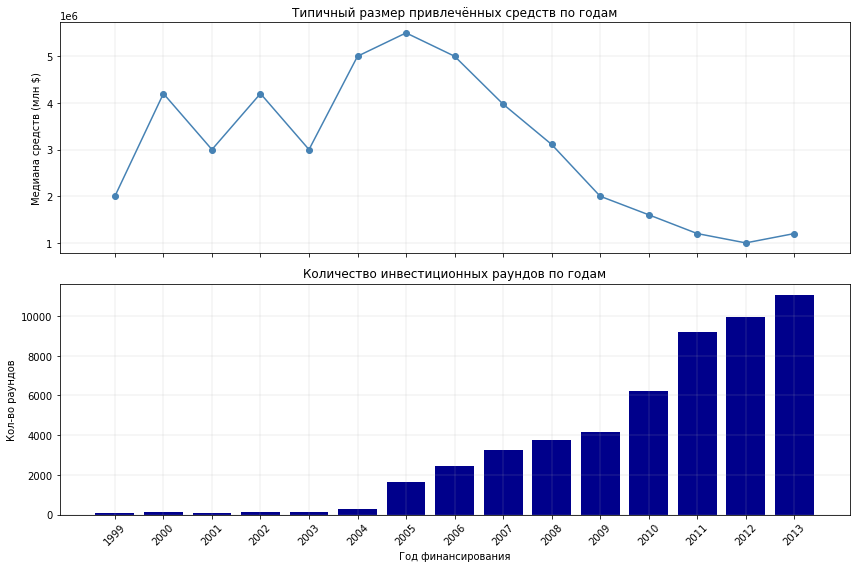

In [28]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

axes[0].plot(summary['funded_at'].astype(str), summary['typical_raised_amount'], marker='o', color='steelblue')
axes[0].set_ylabel('Медиана средств (млн $)')
axes[0].set_title('Типичный размер привлечённых средств по годам')
axes[0].grid(linewidth = 0.2)

axes[1].bar(summary['funded_at'].astype(str), summary['funding_rounds_count'], color='darkblue')
axes[1].set_xlabel('Год финансирования')
axes[1].set_ylabel('Кол-во раундов')
axes[1].set_title('Количество инвестиционных раундов по годам')
axes[1].grid(linewidth = 0.2)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Максимальный типичный размер средств был в 2005 году - 5.5 млн. 

В 2013 году наблюдается тенденция к увеличению кол-ва раундов финансирования, в этот год самый высокий показатель - 11 тыс. Однако средняя сумма раунда не так высока, как была в пике - 1.2 млн. Вероятно увеличение кол-ва раундов негативно сказалось на сумме. 


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

- Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.
- Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

In [29]:
people_edu = people.merge(edu, left_on='id', right_on='person_id', how='left')

people_edu = people_edu.dropna(subset=['company_id'])

company_sizes = people_edu.groupby('company_id').size().reset_index(name='employee_count')

people_edu = people_edu.merge(company_sizes, on='company_id', how='left')

# Выбрана такая разбивка, поскольку, судя по информации, выводимой describe, кол-во компаний с сотрудниками в кол-ве 
# 1-2 человека преобладающее кол-во. Макс. - около 380. Из этого выводилась примерная разбивка
bins = [0, 2, 10, 50, 200, 400]
labels = ['Микро', 'Малые', 'Средние', 'Крупные', 'Очень крупные']
people_edu['company_size_group'] = pd.cut(people_edu['employee_count'], bins=bins, labels=labels, right=True)

people_edu['no_education_info'] = people_edu['institution'].isna()

result = people_edu.groupby('company_size_group')['no_education_info'].mean().reset_index()

print(result)

  company_size_group  no_education_info
0              Микро           0.446317
1              Малые           0.272182
2            Средние           0.277214
3            Крупные           0.178042
4      Очень крупные           0.194305


На основе данных можно сделать вывод, что чем крупнее компания, тем выше полнота сведений об образовании сотрудников. В микро- и малых компаниях доля сотрудников без информации об образовании превышает 27–44%, тогда как в крупных и очень крупных — около 17–19%. В крупных компаниях зачастую более формализованные и бюрократизированные процессы, вследствие чего необходимо предоставление таких сведений. В малых компаниях сотрудники могут, в том числе, работать на себя. 

Относительно присоединения информации из столбца `degree` - это вполне возможно и даст больше информации об образовании (степени, предмете обучения). В случае, если потребуется провести анализ того, работают ли сотрудники по своей сфере или есть каков процент магистров среди сотрудников, эи сведения будут полезны.

In [30]:
deg['person_id'] = deg['object_id'].astype(str).str.replace('p:', '', regex=False).astype(int)

people_edu_deg = people_edu.merge(deg, on='person_id', how='left')

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
- Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

In [31]:
print("Заполненность в столбце people:", people['network_username'].notna().mean())
print("Заполненность в столбце company:", company['network_username'].notna().mean())
print("Заполненность в столбце fund:", fund['network_username'].notna().mean())

print("--------------------")

people_in_company = people['network_username'].dropna().isin(company['network_username'].dropna())
print("Кол-во совпадающих значений people и company:", people_in_company.sum())

people_in_fund = people['network_username'].dropna().isin(fund['network_username'].dropna())
print("Кол-во совпадающих значений people и fund:", people_in_fund.sum())

company_in_fund = company['network_username'].dropna().isin(fund['network_username'].dropna())
print("Кол-во совпадающих значений company и fund:", company_in_fund.sum())

Заполненность в столбце people: 0.17144003987490572
Заполненность в столбце company: 0.43868414043917087
Заполненность в столбце fund: 0.1844318571918984
--------------------
Кол-во совпадающих значений people и company: 2270
Кол-во совпадающих значений people и fund: 79
Кол-во совпадающих значений company и fund: 85


Стобец `network_username` не особо подходит для объединения, поскольку:

1. Несет в себе разные данные: в `people` означает ник сотрудника в сети, в `company` - ник компании, в `fund` - ник фонда. Они могут совпадать, но не являются идентичными
2. Заполненость составляет 5-20%, что довольно мало.
3. Кол-во совпадений невелико: из 38 тыс. значений в `people` и 95.5 тыс. в `company` совпадают лишь 2.2 тыс. В других соотношениях еще меньше.

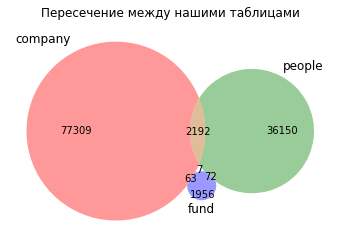

In [41]:
# Вариант визуализации
!pip install matplotlib-venn -q
import matplotlib.pyplot as plt
from matplotlib_venn import  venn3

first_id = set(company['network_username'].dropna().unique())
second_id = set(people['network_username'].dropna().unique())
third_id = set(fund['network_username'].dropna().unique())

# Строим диаграмму Венна 
venn3([first_id, second_id, third_id], set_labels=('company', 'people', 'fund'))

plt.title("Пересечение между нашими таблицами")
plt.show()



### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Любым удобным способом приведите данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

Выше уже рассматривалось кол-во пропусков в таблице:

In [33]:
na_company = pd.DataFrame(round(company.isna().mean() * 100, 2), columns=['missing_%'])

na_company_sorted = na_company.sort_values(by='missing_%', ascending=False)

na_company_sorted.style.background_gradient('coolwarm')

,missing_%
closed_at,98.420000
funded_at,75.810000
pre_money_valuation,75.700000
funding_round_id,75.700000
raised_amount,75.700000
participants,75.700000
funding_round_type,75.700000
network_username,56.130000
country_code,50.130000
founded_at,49.510000


In [34]:
company_summary = company.groupby('company_id').agg({
    'name': 'last',                 
    'category_code': 'last', 
    'country_code': 'last', 
    'founded_at': 'first',           
    'closed_at': 'first',
    'status':'last', 
    'investment_rounds': 'max',      
    'funding_rounds': 'max',         
    'funding_total': 'max',
    'raised_amount':'max',
    'participants': 'max'}).reset_index()

company_summary.head(7)

,company_id,name,category_code,country_code,founded_at,closed_at,status,investment_rounds,funding_rounds,funding_total,raised_amount,participants
0,1.0,Wetpaint,web,USA,2005-10-17,NaT,operating,0,3,3.975000e+07,2.500000e+07,4
1,2.0,AdventNet,enterprise,USA,1996-01-01,NaT,operating,0,0,0.000000e+00,NaN,<NA>
2,3.0,Zoho,software,USA,2005-09-15,NaT,operating,0,0,0.000000e+00,NaN,<NA>
3,4.0,Digg,news,USA,2004-10-11,NaT,acquired,0,4,4.500000e+07,2.870000e+07,8
4,5.0,Socialnet,social,USA,2004-02-01,NaT,ipo,3,11,2.425700e+09,1.500000e+09,4
5,7.0,Omnidrive,network_hosting,ISR,2005-11-01,2008-09-15,closed,0,1,8.000000e+05,8.000000e+05,4
6,8.0,Postini,web,USA,1999-06-02,NaT,acquired,0,0,0.000000e+00,NaN,<NA>


Из возможных вариаций, вариант сгруппировать данные показался оптимальным. Пропуски были оставлены без лишних заполнений, дабы не исказить анализ. Никакие столбцы не были удалены, поскольку более половины фин. информации составляют пропуски, а данные нам необходимы. Пропуски в столбце с закрытием, вероятно, не случайны, поскольку компании могут продолжать свою деятельность по сей день. Таким образом:
1. Было взято последнее название компании - более актуальное
2. Последний вид деятельности, так как компания могла ее сменить со временем
3. Последний код страны, так как компания могла релоцироваться
4. Первый год основания
5. Последний встречающийся год закрытия
6. Последний статус деятельности
7. Максимальное кол-во инвест. раундов
8. Максимальное кол-во раундов финансирования
9. Максимальное кол-во средств, полученных по итогам всех финасирований
10. Максимальное кол-во средств, привлеченная в в конкретном раунде финансирования
11. Максимальное кол-во участников (оно могло увеличиваться с течением времени и по ходу роста компании)

P.S.: буду очень рада советам о том, как еще можно было бы привести данные к виду для анализа по каждой компании, поскольку мои идеи исчерпаны и, кажется, эта задача понята не до конца.

In [35]:
company_summary.sort_values(by = 'name', ascending=False)

,company_id,name,category_code,country_code,founded_at,closed_at,status,investment_rounds,funding_rounds,funding_total,raised_amount,participants
185285,273343.0,óga,fashion,IRL,NaT,NaT,operating,0,0,0.0,NaN,<NA>
39041,48541.0,Übermind,software,USA,1999-07-01,NaT,operating,0,0,0.0,NaN,<NA>
190175,278667.0,ÜberResearch,web,DEU,NaT,NaT,operating,0,1,0.0,0.0,1
185257,273315.0,Únas Pies,hospitality,IRL,NaT,NaT,operating,0,0,0.0,NaN,<NA>
95022,170320.0,Østjysk Innovation A/S,NaN,NaN,NaT,NaT,operating,1,0,0.0,NaN,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
191224,279804.0,None,None,None,NaT,NaT,None,<NA>,<NA>,NaN,0.0,1
193617,282450.0,None,None,None,NaT,NaT,None,<NA>,<NA>,NaN,2600000.0,0
194003,282847.0,None,None,None,NaT,NaT,None,<NA>,<NA>,NaN,5500000.0,0
194597,283492.0,None,None,None,NaT,NaT,None,<NA>,<NA>,NaN,3602480.0,5


In [36]:
company_cols = [
    'company_id', 'name', 'category_code', 'status', 'founded_at', 'closed_at',
    'domain', 'network_username', 'country_code', 'investment_rounds',
    'funding_rounds', 'funding_total', 'milestones'
]

companies = company[company_cols].drop_duplicates(subset='company_id')

round_cols = [
    'funding_round_id', 'company_round_id', 'funded_at', 'funding_round_type',
    'raised_amount', 'pre_money_valuation', 'participants', 'is_first_round', 'is_last_round'
]

rounds = company[round_cols].dropna(subset=['funding_round_id'])


## Шаг 3. Исследовательский анализ объединённых таблиц




### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. В результирующей таблице должно получиться порядка 40 тысяч компаний.

Проверьте полноту и корректность получившейся таблицы. Далее работайте только с этими данными.

In [37]:
filtered_companies = company[
    (company["funding_rounds"] > 0) |
    (company["investment_rounds"] > 0) |
    (company["status"] == "acquired")]

print(f"Кол-во исходных фильтрованных данных: {filtered_companies.shape[0]:,}")

print(f"Кол-во дубликатов: {filtered_companies['company_id'].duplicated().sum()}")
filtered_companies = filtered_companies.drop_duplicates(subset='company_id')

print(f"Кол-во компаний результирующей таблицы: {filtered_companies.shape[0]:,}")

Кол-во исходных фильтрованных данных: 61,666
Кол-во дубликатов: 20919
Кол-во компаний результирующей таблицы: 40,747


Данные отобраны по условиям заказчика, их кол-во соответсвует предполагаемому.


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

In [38]:
filtered_companies['funding_total'].describe()

count    4.074700e+04
mean     1.013561e+07
std      5.646436e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+05
75%      5.650650e+06
max      5.700000e+09
Name: funding_total, dtype: float64

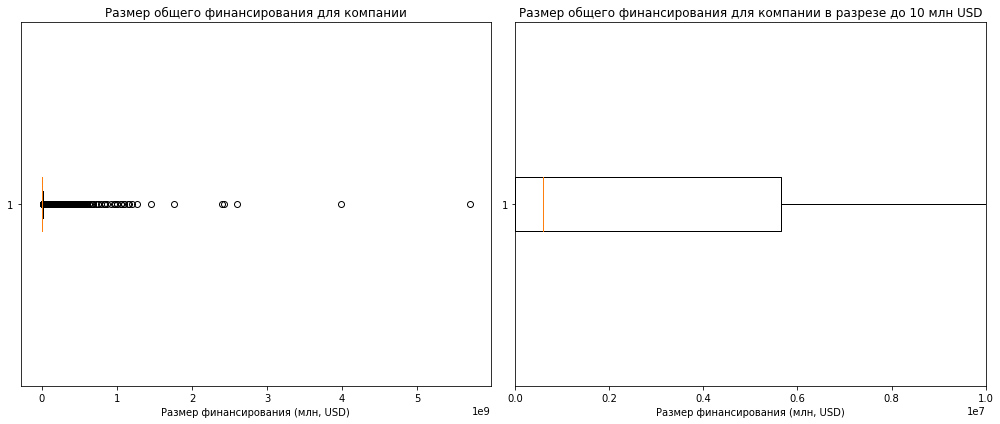

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Полномасштабный график 
axs[0].boxplot(filtered_companies['funding_total'].dropna(), vert=False)
axs[0].set_title('Размер общего финансирования для компании')
axs[0].set_xlabel('Размер финансирования (млн, USD)')

# Ограниченный график (до 10 млн)
axs[1].boxplot(filtered_companies['funding_total'].dropna(), vert=False)
axs[1].set_xlim(0, 10_000_000)
axs[1].set_title('Размер общего финансирования для компании в разрезе до 10 млн USD')
axs[1].set_xlabel('Размер финансирования (млн, USD)')

plt.tight_layout()
plt.show()

Распределение финансирования сильно смещено вправо — с большим числом экстремальных значений.

- Медиана (50%) — всего 600 тыс., что говорит о том, что половина компаний привлекала не больше этой суммы.
- Среднее — около 10 млн, но оно искажено за счёт единичных крупных сделок (максимум — 5.7 млрд).
- 25% — 0, 75% — 5.65 млн, то есть только четверть компаний привлекала более 5.65 млн.
- Большое стандартное отклонение (std ≈ 56 млн) подтверждает высокую разбросанность.

Типичным объёмом финансирования можно считать 0.6 млн (медиана).
Значения от 20–30 млн и выше выглядят как выбивающиеся и характерны только для ограниченного числа компаний.



### 3.3. Куплены забесплатно?

- Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют.

In [42]:
filtered_acquisitions = acq[acq['price_amount'].isin([0, 1])]

merged_data = filtered_acquisitions.merge(filtered_companies, left_on='acquired_company_id', right_on='company_id', how='left')
filtered = merged_data[merged_data['funding_total'] > 0]

Q1 = filtered['funding_total'].quantile(0.25)
Q3 = filtered['funding_total'].quantile(0.75)

# Межквартильный размах
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# 5. Смотрим, каким процентилям они соответствуют
lower_data = (filtered['funding_total'] < lower).mean() * 100
upper_data = (filtered['funding_total'] > upper).mean() * 100

print(f"25-й перцентиль (Q1): {Q1}")
print(f"75-й перцентиль (Q3): {Q3}")
print(f"IQR: {IQR}")
print(f"Нижняя граница выбросов: {lower} (меньше границы — {lower_pct:.2f}% значений)")
print(f"Верхняя граница выбросов: {upper} (больше границы — {upper_pct:.2f}% значений)")

25-й перцентиль (Q1): 2000000.0
75-й перцентиль (Q3): 15500000.0
IQR: 13500000.0


NameError: name 'lower_pct' is not defined

Типичным объёмом привлечённых средств можно считать диапазон от 2 млн до 15.5 млн долл. Свыше 35.75 млн долл. - выбросы, однако около 9.09% компаний попали выше этой границы. Нижняя граница отрицательна и выбросов вниз нет. 


### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [ ]:
merged = acq.merge(company, left_on='acquired_company_id', right_on='company_id')

merged = merged[merged['price_amount'].notnull()]

grouped = merged.groupby('category_code')['price_amount'].agg(['median', 'std', 'count']).reset_index()

grouped = grouped[grouped['count'] > 10]

top_categories = grouped.sort_values(by=['median', 'std'], ascending=[False, False]).head(5)

print(top_categories)

По заданию заказчика необходимо было определить категории стартапов с типично высокими ценами сделок и высокими рисками.

Для оценки типичного уровня использовали медиану, а для оценки риска — стандартное отклонение. Учитывались только категории с более чем 10 сделками, чтобы обеспечить достаточную статистическую основу.

Был выделен топ-5, так как именно они лучше всего соответствуют критериям заказчика — высокий средний уровень и значительная волатильность, что делает их интересными для инвесторов, готовых к риску.

Выводы по полученным данным:

1. Наибольшими типичными ценами покупки (медиана 40 млн) и одновременно значительным разбросом цен выделяются категории manufacturing и photo_video. Это делает их потенциально привлекательными для крупных инвесторов, готовых к риску ради высокой доходности. 
2. Категория biotech показывает чуть меньшую медианную цену (17.6 млн), но имеет наибольший разброс цен (стандартное отклонение более 1.3 млрд), что указывает на крайне высокую волатильность в этой сфере.
3. Hospitality и finance демонстрируют меньшие медианы, но сохраняют высокий разброс, что может говорить о наличии отдельных крайне дорогих сделок на фоне умеренного уровня.


### 3.5. Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [ ]:
rounds_filter = company[['status', 'funding_rounds']].dropna()

avg_rounds = rounds_filter.groupby('status')['funding_rounds'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_rounds, x='status', y='funding_rounds', color ='#4682B4')
plt.title('Среднее кол-во раундов финансирования в разрезе статуса стартапа')
plt.ylabel('Среднее количество раундов')
plt.xlabel('Статус стартапа')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. Наибольшее кол-во раундов у стартапов в статусе IPO - выход на биржу. Это предполагает наличие зрелой бизнес-модели, выручки, масштаба, что требует финансирования и побуждает стартапы проходить очередные раунды для получения средств. 
2. У закрывшихся (closed) компаний средний показатель ниже (≈ 1.6), что может говорить, либо о попытках привлечь средства перед закрытием, либо о позднем обращении за финансированием для поддержания компании "на плаву".
3. У поглощённых (acquired) стартапов ещё меньше раундов (≈ 1.2), поскольку часто их покупают раньше, чем компания пройдет большое кол-во инвестиционных циклов.
4. Действующие стартапы прошли наименьшее кол-во раундов. У нас нет информации относительно того, насколько зрелыми они являются, но, вероятно, многие из них на ранней стадии и готовятся к следующим подачам на финансирование. 


## Шаг 4. Итоговый вывод и рекомендации

В ходе анализа были исследованы семь датасетов (два из которых вспомогательны) с исторической информацией о стартапах. Основное внимание было уделено датасету `company` с данными о компаниях и финансировании. Датасет содержали до обработки около 220 тыс. строк и 22 столбца.

Проделанная работа:

- изучено содержимое всех датасетов (кол-во строк, столбцов, типы данных)
- данные нормализованы и преобразованы в более удобные для работы форматы
- выявлены пропуски, данные очищены от явных и неявных дубликатов (где это было необходимо) 
- выявлена динамика сумм финансирования по годам, оценено наличие сведений об образовании сотрудников, рассмотрен столбец `network_username` как потенциальный ключ для объединения датасетов
- данные в датасете `company_and_rounds.csv` приведены к удобным вариациям: на их основе создана таблица с приоритетными данными для заказчика \ таблица резделена на две логические сущности (companies и rounds) 
- из датасета company_and_rounds.csv получено около 40 000 компаний, потенциально интересных заказчику 
- проведен анализ компаний, получивших финансирование, но проданных за 0 или 1 долл.
- выделены топ-5 категорий стартапов с высокими ценами и рисками
- рассчитано среднее колв-о раундов в разрезе статуса компании

**Общие выводы**:

1. Типичный объём привлечённого финансирования — 600 тыс, но разброс огромен: почти 10% компаний получили свыше 35 млн. Среднее значение (10 млн) некорректно отражает реальность из-за выбросов, нужно быть аккуратными с оценкой финансовых данных. 

2. Наиболее привлекательные для риск-ориентированных инвесторов категории — промышленность, сфера видео и фото и биотех: у них одновременно высокая медианная цена покупки и значительная волатильность.

3. Чем выше статус стартапа, тем больше раундов финансирования он прошёл. IPO-компании — самые зрелые, действующие стартапы часто находятся на ранней стадии.

4. Обнаружены сделки с продажей за 0 и 1 долл. при полученном финансирования — их немного, но они указывают на необходимость учитывать нестандартные сценарии.

Данные пригодны для разработки модели оценки стартапов. Они дают представление о стадиях развития, рыночных нишах и финансах. Для жизнеспособной бизнес-модели, вероятно, потребуется привлечение дополнительных данных для более детального анализа финансирования.

**Рекомендации для заказчика**:

1. Для построения устойчивой модели необходимы дополнительные параметры: выручка, статус компании (более детальный), продуктовая стадия, причины. Сейчас их нет, и это ограничивает надёжность оценки и выводы. 

2. Детально изучить аномалии продаж за 0 и 1 долл: стоит уточнить, не связаны ли они с банкротствами, внутренними сделками или юридическими сложностями.

3. Уточнить данные по сделкам: причины аномалий (технический/ человеческий фактор), причины перекоса распределений (почему для одних стартапов были заключены дорогие сделки, для множества других - малые). 